# CT5120 Assignment 2

This notebook is focused on sentiment classification and span extraction from tweets.



# 1. Data Analysis
    


  


**Task 1:**

First we start off by importing the necessary libraries. Then we import the necessary csv files which is our datasets. To plot the frequency distribution of each of the sentiment classes we will first create a seperate dataframe consisting of only the class labels which are positive, neutral and negative. Then we plot the distribution.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

C:\Users\navee\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
nltk.download('treebank')
nltk.download('stopwords')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<Figure size 1000x700 with 0 Axes>

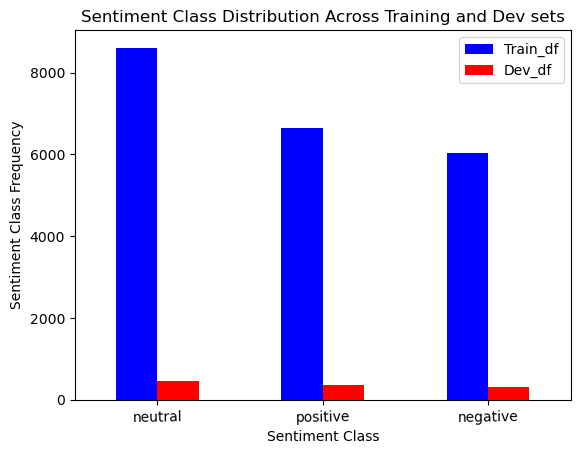

In [ ]:
df_train = pd.read_csv('train.csv')
df_dev = pd.read_csv('dev.csv')
df_test = pd.read_csv('test.csv')
train_sentiments = df_train['sentiment'].value_counts()
dev_sentiments = df_dev['sentiment'].value_counts()
sentiment_df = pd.DataFrame({
    'Train_df' : train_sentiments,
    'Dev_df' : dev_sentiments
})
plt.figure(figsize = (10, 7))
sentiment_df.plot(kind = 'bar', color = ['blue', 'red'])
plt.title("Sentiment Class Distribution Across Training and Dev sets")
plt.xlabel("Sentiment Class")
plt.xticks(rotation = 1)
plt.ylabel("Sentiment Class Frequency")
plt.show()

# 2. Sentiment Classification






**Task 2**

We perform preprocessing of the data such as removing stopwords, punctuations and perform tokenization operations and have used TF-IDF vectorizer. The NLTK library along with Scikit learn's feature extraction methods come in handy to perform all these preprocessing operations. Using scikit learn we will implement the Support vector Classifier on the preprocessed data.



To calculate precision, recall, f1 score and macro average score we will use the classification report metrics from scikit learn which will give all these values.



The Random Forest Classifier has being used as an alternative. It uses several decision trees and uses the concept of 'Sampling with Replacement' technique. After using 500 trees, Random Forest Classifier is performing a little better than Support Vector Classifier. Again, using Scikit Learn the Random Forest Classifier algorithm is implemented.


The prediction file has been submitted with the name "23100638_Naveen_James.csv" and got the score 0.7190

In [ ]:
treebank_tokenizer = TreebankWordTokenizer()
stopwords_set = set(stopwords.words('english'))
def text_preprocessor(text):
    tokens = treebank_tokenizer.tokenize(text)
    return " ".join([token.lower() for token in tokens if token.lower() not in stopwords_set and token not in string.punctuation])
df_train['preprocessed_text'] = df_train['text'].apply(lambda x: text_preprocessor(x) if isinstance(x, str) else "")
df_dev['preprocessed_text'] = df_dev['text'].apply(lambda x: text_preprocessor(x) if isinstance(x, str) else "")
tf_idf = TfidfVectorizer()
X_train = tf_idf.fit_transform(df_train['preprocessed_text'])
X_dev = tf_idf.transform(df_dev['preprocessed_text'])
y_train = df_train['sentiment']
y_dev = df_dev['sentiment']
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_dev)
print("CLASSIFICATION REPORT FOR SUPPORT VECTOR CLASSIFIER\n")
print(classification_report(y_dev, svc_pred))
rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_dev)
print("CLASSIFICATION REPORT FOR RANDOM FOREST CLASSIFIER\n")
print(classification_report(y_dev, rfc_pred))

CLASSIFICATION REPORT FOR SUPPORT VECTOR CLASSIFIER

              precision    recall  f1-score   support

    negative       0.75      0.51      0.61       317
     neutral       0.59      0.79      0.68       453
    positive       0.75      0.65      0.70       350

    accuracy                           0.67      1120
   macro avg       0.70      0.65      0.66      1120
weighted avg       0.69      0.67      0.66      1120

CLASSIFICATION REPORT FOR RANDOM FOREST CLASSIFIER

              precision    recall  f1-score   support

    negative       0.73      0.56      0.64       317
     neutral       0.62      0.72      0.67       453
    positive       0.70      0.70      0.70       350

    accuracy                           0.67      1120
   macro avg       0.69      0.66      0.67      1120
weighted avg       0.68      0.67      0.67      1120



In [ ]:
# Creating a new csv file to store the sentiments
test = df_test.copy()
test['text'] = [text_preprocessor(text) for text in test['text'].values]
texts = test['text']
texts = texts.fillna("")
X_test_tf_idf = tf_idf.transform(texts)
y_preds = rfc.predict(X_test_tf_idf)
sample = pd.read_csv('sample_solution.csv')
sample['sentiment'] = y_preds
sample.to_csv('23100638_Naveen_James.csv', index = False)

# 3. Span Extraction


**Task 3**

In order to predict the text of interested the approach we can take is using word frequencies and probability scores. Weights are assigned to the terms based upon their occurences in each of the sentiments. We split the dataset into three parts, positive, neutral and negative. Then using bag of words we vectorize the text data present in our training dataset. The similarity method we used is Jaccard Similarity. We use it to compare the similarity between the prediction and the actual. Finally we use the test data to see the final predictions.



To measure the similarity between two sets of interest one of the approaches we can take is Jaccard Similarity. A value of 0 means there is no similarity between the two sets and a value of 1 means the sets have similarity.

In [ ]:
sample = pd.read_csv('23100638_Naveen_James.csv')
df_train['text'] = df_train['text'].apply(lambda x: x.lower())
df_test['text'] = df_test['text'].apply(lambda x: x.lower())
pos_train = df_train[df_train['sentiment'] == 'positive']
neutral_train = df_train[df_train['sentiment'] == 'neutral']
neg_train = df_train[df_train['sentiment'] == 'negative']
count_vec = CountVectorizer(max_df = 0.95, min_df = 2, max_features = 10000, stop_words = 'english')
X_train_cvec = count_vec.fit_transform(df_train['text'])
X_pos = count_vec.transform(pos_train['text'])
X_neutral = count_vec.transform(neutral_train['text'])
X_neg = count_vec.transform(neg_train['text'])
df_pos = pd.DataFrame(X_pos.toarray(), columns = count_vec.get_feature_names_out())
df_neutral = pd.DataFrame(X_neutral.toarray(), columns = count_vec.get_feature_names_out())
df_neg = pd.DataFrame(X_neg.toarray(), columns = count_vec.get_feature_names_out())
pos_words = {}
neutral_words = {}
neg_words = {}
for i in count_vec.get_feature_names_out():
    pos = df_pos[i].sum()
    neutral = df_neutral[i].sum()
    neg = df_neg[i].sum()
    pos_words[i] = pos / df_pos.shape[0]
    neutral_words[i] = neutral / df_neutral.shape[0]
    neg_words[i] = neg / df_neg.shape[0]
pos_words_weights = {}
neutral_words_weights = {}
neg_words_weights = {}
for key, value in neg_words.items():
    neg_words_weights[key] = neg_words[key] - (neutral_words[key] + pos_words[key])
for key, value in pos_words.items():
    pos_words_weights[key] = pos_words[key] - (neutral_words[key] + neg_words[key])
for key, value in neutral_words.items():
    neutral_words_weights[key] = neutral_words[key] - (neg_words[key] + pos_words[key])
df_test['sentiment'] = sample['sentiment']

In [ ]:
def text_selection(df_row, tol = 0):
    tweet = df_row['text']
    sentiment = df_row['sentiment']
    if (sentiment == 'neutral'):
        return tweet
    elif (sentiment == 'positive'):
        dict_to_use = pos_words_weights
    elif (sentiment == 'negative'):
        dict_to_use = neg_words_weights
    words = tweet.split()
    words_len = len(words)
    subset = [words[i : j + 1] for i in range(words_len) for j in range(i, words_len)]
    score = 0
    selection_str = ''
    lst = sorted(subset, key = len)
    for i in range(len(subset)):
        new_sum = 0
        for p in range(len(lst[i])):
            if (lst[i][p].translate(str.maketrans("", "", string.punctuation)) in dict_to_use.keys()):
                new_sum += dict_to_use[lst[i][p].translate(str.maketrans('', '', string.punctuation))]
        if (new_sum > score + tol):
            score = new_sum
            selection_str = lst[i]
    if (len(selection_str) == 0):
        selection_str = words
    return " ".join(selection_str)
pd.options.mode.chained_assignment = None
tol = 0.001
df_dev["prediction"] = ""
for i, r in df_dev.iterrows():
    selected_txt = text_selection(r, tol)
    df_dev.loc[df_dev['textID'] == df_dev['textID'], ['prediction']] = selected_txt

In [ ]:
def jaccard(str1, str2):
    a = set(str1.lower().split())
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))
df_dev['jaccard'] = df_dev.apply(lambda x: jaccard(str(x['selected_text']), str(x['prediction'])), axis = 1)
print("Jaccard Score: ", np.mean(df_dev['jaccard']))

Jaccard Score:  0.01665845256036915


In [ ]:
positive = df_train[df_train['sentiment'] == 'positive']
neutral = df_train[df_train['sentiment'] == 'neutral']
negative = df_train[df_train['sentiment'] == 'negative']

In [ ]:
final_count_vec = count_vec.fit_transform(df_train['text'])
X_pos = count_vec.transform(positive['text'])
X_neutral = count_vec.transform(neutral['text'])
X_neg = count_vec.transform(negative['text'])
df_pos_count = pd.DataFrame(X_pos.toarray(), columns = count_vec.get_feature_names_out())
df_neutral_count = pd.DataFrame(X_neutral.toarray(), columns = count_vec.get_feature_names_out())
df_neg_count = pd.DataFrame(X_neg.toarray(), columns = count_vec.get_feature_names_out())

In [ ]:
positive_words = {}
neutral_words = {}
negative_words = {}
for i in count_vec.get_feature_names_out():
    pos = df_pos_count[i].sum()
    neut = df_neutral_count[i].sum()
    neg = df_neg_count[i].sum()
    pos_words[i] = pos / (positive.shape[0])
    neutral_words[i] = neut / (neutral.shape[0])
    negative_words[i] = neg / (negative.shape[0])

In [ ]:
pos_words_weights = {}
neutral_words_weights = {}
neg_words_weights = {}
for key, value in pos_words.items():
    pos_words_weights[key] = pos_words[key] - (neutral_words[key] + neg_words[key])
for key, value in neutral_words.items():
    neutral_words_weights[key] = neutral_words[key] - (neg_words[key] + pos_words[key])
for key, value in neg_words.items():
    neg_words_weights[key] = neg_words[key] - (neutral_words[key] + pos_words[key])

In [ ]:
tol = 0.001
for i, r in df_test.iterrows():
    sel_txt = text_selection(r, tol)
    sample.loc[sample['textID'] == r['textID'], ['selected_text']] = sel_txt

In [ ]:
sample.head()

,textID,sentiment,selected_text
0,1ecb27d443,neutral,packing up my desk
1,8def14ecb6,negative,(ugh!)
2,d8ab6dfc33,positive,doin fine relaxin at work... hardly working
3,a40a9840b0,neutral,cant fall asleep.
4,9fd06d16fa,neutral,day off with nothing to do
